All the equations for the following codes are taken from the Manuscript: $\textit{S. Debnath; 2024. GENERAL RELATIVISTIC TIDAL DEFORMATION AND GRAVITATIONAL WAVES OF A BINARY SYSTEM BY A MASSIVE.}$ And for computational purpose, the mass of $m_1$ is taken to be $1.4 M\odot$, $m_2$ is taken to be $2.9 M\odot$, which are the typical masse range for neutron stars. $M_{BH}$ is the mass of the central black hole which we approximate as the mass of $Sgr A*$ which is roughly around $4.3\times 10^6 M\odot$. Where, $M\odot$ is the Solar mass which is around $1.898\times 10^{30}$Kg. $G=6.67430\times{-11} m^3 kg^{-1} s^{-2}$ and, $c=3\times10^8 m/s$. Black hole spin is zero throughout the computation,i.e. Schwarzschild Black hole. $r$ is the radial distance between the binary and the black hole, which is taken to be normalized as $10^6 m$.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


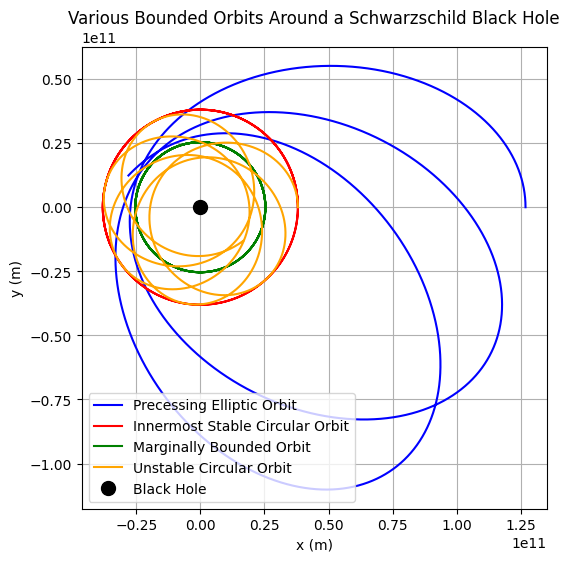

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e30  # Solar mass in kg
M_BH = 4.3e6 * M_sol  # Mass of the black hole in kg

# Schwarzschild radius
rs = 2 * G * M_BH / c**2

# Specific energy and angular momentum for precessing orbit
E = 0.95  # Specific energy (0 < E < 1 for bound orbits)
L = np.sqrt(12) * G * M_BH / c  # Specific angular momentum

# Equations of motion for a precessing orbit
def equations_precessing(tau, y):
    r, phi, pr, pphi = y
    dr_dtau = pr
    dphi_dtau = pphi / r**2
    dpr_dtau = -G * M_BH / r**2 + pphi**2 / r**3 - G * M_BH * (1 - rs / r) / r**2
    dpphi_dtau = 0
    return [dr_dtau, dphi_dtau, dpr_dtau, dpphi_dtau]

# Initial conditions for precessing orbit
r0_precessing = 10 * rs  # Initial radial distance
phi0_precessing = 0  # Initial angle
pr0_precessing = 0  # Initial radial momentum
pphi0_precessing = L  # Initial angular momentum

y0_precessing = [r0_precessing, phi0_precessing, pr0_precessing, pphi0_precessing]

# Time span for the integration
tau_span_precessing = (0, 10000)

# Solve the differential equations for precessing orbit
solution_precessing = solve_ivp(equations_precessing, tau_span_precessing, y0_precessing, max_step=1e-2, rtol=1e-8, atol=1e-8)

# Extract the solution for precessing orbit
r_precessing = solution_precessing.y[0]
phi_precessing = solution_precessing.y[1]

# Convert to Cartesian coordinates for precessing orbit
x_precessing = r_precessing * np.cos(phi_precessing)
y_precessing = r_precessing * np.sin(phi_precessing)

# ISCO radius
r_isco = 6 * G * M_BH / c**2

# Equations of motion for an oscillating circular orbit
def equations_oscillating(tau, y):
    r, phi, pr, pphi = y
    dr_dtau = 0  # Radial velocity is zero for circular orbit
    dphi_dtau = np.sqrt(G * M_BH / r**3)  # Angular velocity for circular orbit
    dpr_dtau = 0
    dpphi_dtau = 0
    return [dr_dtau, dphi_dtau, dpr_dtau, dpphi_dtau]

# Initial conditions for oscillating circular orbit
r0_oscillating = r_isco  # ISCO radius
phi0_oscillating = 0  # Initial angle
pr0_oscillating = 0  # Initial radial momentum
pphi0_oscillating = np.sqrt(G * M_BH * r_isco)  # Initial angular momentum for circular orbit

y0_oscillating = [r0_oscillating, phi0_oscillating, pr0_oscillating, pphi0_oscillating]

# Time span for the integration for oscillating circular orbit
tau_span_oscillating = (0, 5000)

# Solve the differential equations for oscillating circular orbit
solution_oscillating = solve_ivp(equations_oscillating, tau_span_oscillating, y0_oscillating, max_step=1e-2, rtol=1e-8, atol=1e-8)

# Extract the solution for oscillating circular orbit
r_oscillating = solution_oscillating.y[0]
phi_oscillating = solution_oscillating.y[1]

# Convert to Cartesian coordinates for oscillating circular orbit
x_oscillating = r_oscillating * np.cos(phi_oscillating)
y_oscillating = r_oscillating * np.sin(phi_oscillating)

# MBO radius
r_mbo = 4 * G * M_BH / c**2

# Equations of motion for a non-oscillating circular orbit
def equations_non_oscillating(tau, y):
    r, phi, pr, pphi = y
    dr_dtau = 0  # Radial velocity is zero for circular orbit
    dphi_dtau = np.sqrt(G * M_BH / r**3)  # Angular velocity for circular orbit
    dpr_dtau = 0
    dpphi_dtau = 0
    return [dr_dtau, dphi_dtau, dpr_dtau, dpphi_dtau]

# Initial conditions for non-oscillating circular orbit
r0_non_oscillating = r_mbo  # Marginally bound orbit radius
phi0_non_oscillating = 0  # Initial angle
pr0_non_oscillating = 0  # Initial radial momentum
pphi0_non_oscillating = np.sqrt(G * M_BH * r_mbo)  # Initial angular momentum for circular orbit

y0_non_oscillating = [r0_non_oscillating, phi0_non_oscillating, pr0_non_oscillating, pphi0_non_oscillating]

# Time span for the integration for non-oscillating circular orbit
tau_span_non_oscillating = (0, 5000)

# Solve the differential equations for non-oscillating circular orbit
solution_non_oscillating = solve_ivp(equations_non_oscillating, tau_span_non_oscillating, y0_non_oscillating, max_step=1e-2, rtol=1e-8, atol=1e-8)

# Extract the solution for non-oscillating circular orbit
r_non_oscillating = solution_non_oscillating.y[0]
phi_non_oscillating = solution_non_oscillating.y[1]

# Convert to Cartesian coordinates for non-oscillating circular orbit
x_non_oscillating = r_non_oscillating * np.cos(phi_non_oscillating)
y_non_oscillating = r_non_oscillating * np.sin(phi_non_oscillating)

# Unstable circular orbit radius
r_unstable = 3 * rs

# Equations of motion for the unstable circular orbit
def equations_unstable(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr
    dphi_dt = pphi / r**2
    dpr_dt = -G * M_BH / r**2 + pphi**2 / r**3 - G * M_BH * (1 - rs / r) / r**2
    dpphi_dt = 0
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

# Initial conditions for the unstable circular orbit
r0_unstable = r_unstable
phi0_unstable = 0
pr0_unstable = 0  # Radial momentum is zero for circular orbit
pphi0_unstable = np.sqrt(G * M_BH * r_unstable)  # Initial angular momentum

y0_unstable = [r0_unstable, phi0_unstable, pr0_unstable, pphi0_unstable]

# Time span for the integration for the unstable circular orbit
t_span_unstable = (0, 5000)

# Solve the differential equations for the unstable circular orbit
solution_unstable = solve_ivp(equations_unstable, t_span_unstable, y0_unstable, max_step=1e-2, rtol=1e-8, atol=1e-8)

# Extract the solution for the unstable circular orbit
r_unstable = solution_unstable.y[0]
phi_unstable = solution_unstable.y[1]

# Convert to Cartesian coordinates for plotting the unstable circular orbit
x_unstable = r_unstable * np.cos(phi_unstable)
y_unstable = r_unstable * np.sin(phi_unstable)

# Plot all orbits
plt.figure(figsize=(6,6))

# Plot precessing orbit
plt.plot(x_precessing, y_precessing, label='Precessing Elliptic Orbit', color='blue')

# Plot oscillating circular orbit
plt.plot(x_oscillating, y_oscillating, label='Innermost Stable Circular Orbit', color='red')

# Plot non-oscillating circular orbit
plt.plot(x_non_oscillating, y_non_oscillating, label='Marginally Bounded Orbit', color='green')

# Plot unstable circular orbit
plt.plot(x_unstable, y_unstable, label='Unstable Circular Orbit', color='orange')

# Plot the black hole at the origin
plt.plot(0, 0, 'ko', markersize=10, label='Black Hole')

# Set plot attributes
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Various Bounded Orbits Around a Schwarzschild Black Hole')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


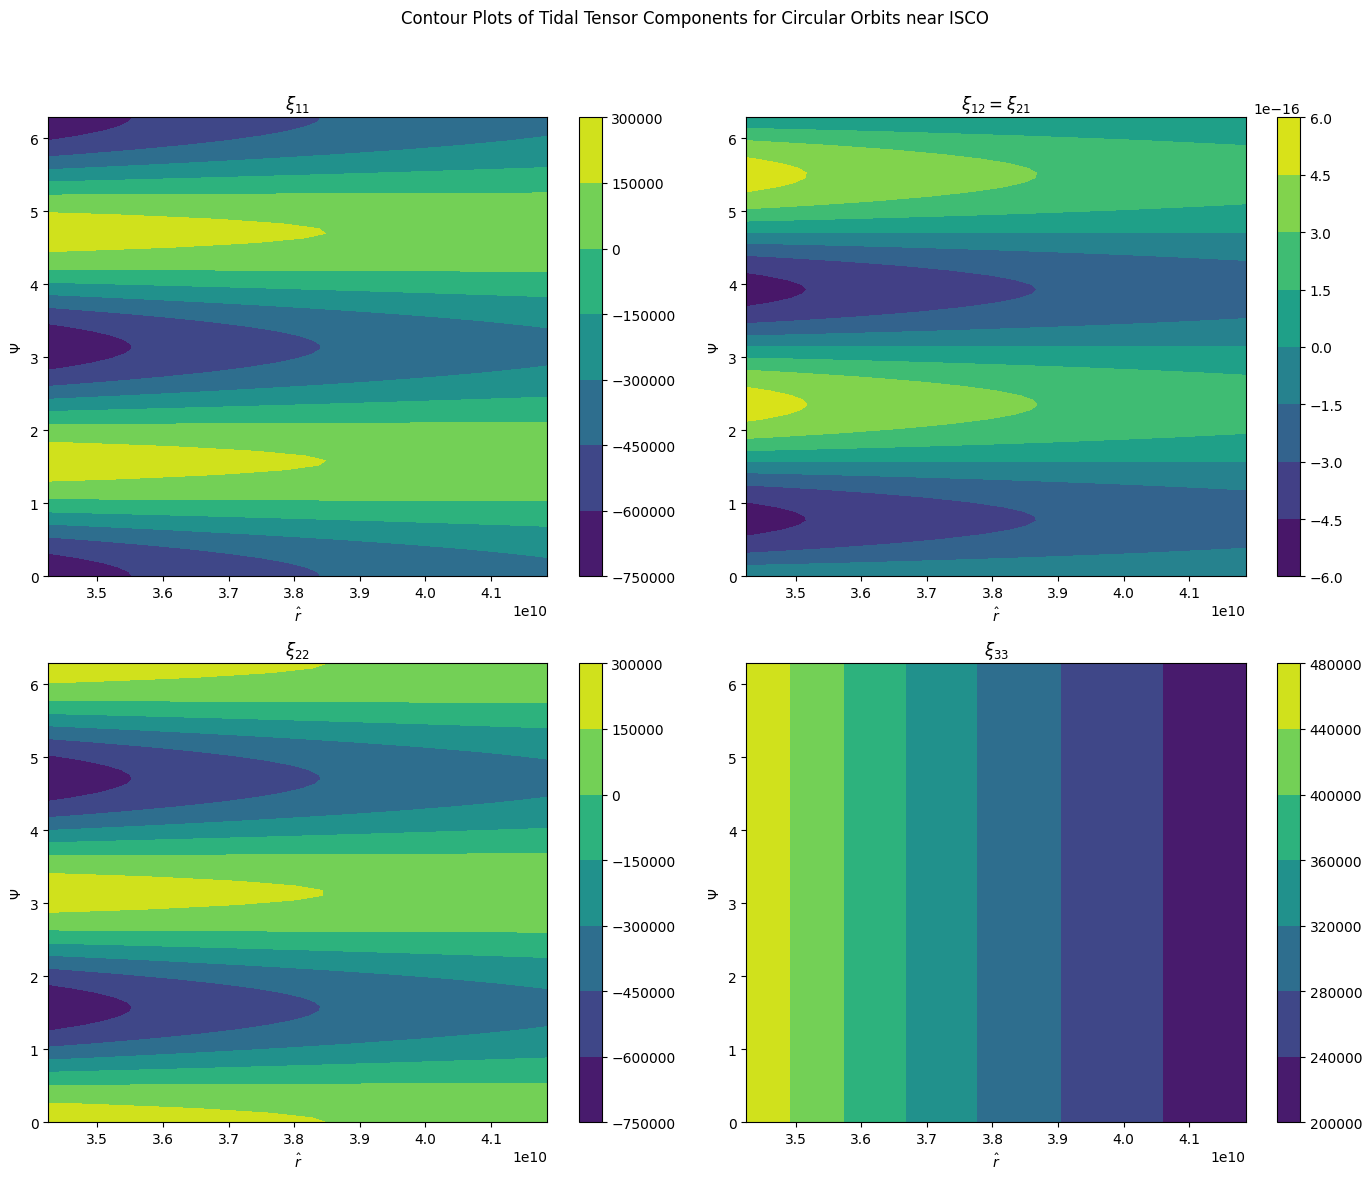

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e30  # Solar mass in kg
M_BH = 4.3e6 * M_sol  # Mass of the black hole in kg

# Define the ISCO radius
r_ISCO = 3 * (2 * G * M_BH) / c**2

# Define A^2
A_squared = 12 * (G * M_BH / c**2)**2

# Define the integral function for Psi_ISCO_circ
def integrand(r):
    numerator = r**2 * np.sqrt(2 / G) * c * (c**2 / (3 * G) - 1)
    denominator = (r**2 + 12 * (G * M_BH / c**2)**2) * np.sqrt(
        2 * c**2 * (c**2 / (3 * G) - 1)**2 * r**4 - (r**2 - 2 * G * M_BH * r) * (r**2 + 12 * (G * M_BH / c**2)**2)
    )
    return numerator / denominator

Psi_ISCO_circ, _ = quad(integrand, 0, r_ISCO)

# Define the tidal tensor components
def xi_11(r, Psi):
    return (1 - 3 * (r**2 + A_squared) / r**2 * np.cos(Psi)**2) * (M_BH / r**3)

def xi_12(r, Psi):
    return -3 * np.sqrt(r**2 + A_squared) / (np.sqrt(A_squared) * r**2) * (M_BH / r**3) * np.sin(Psi) * np.cos(Psi)

def xi_22(r, Psi):
    return (1 - 3 * (r**2 + A_squared) / r**2 * np.sin(Psi)**2) * (M_BH / r**3)

def xi_33(r):
    return (1 + 3 * (np.sqrt(A_squared) / r)**2) * (M_BH / r**3)

# Define the range of r and Psi values
r_values = np.linspace(r_ISCO * 0.9, r_ISCO * 1.1, 100)  # Slightly around ISCO
Psi_values = np.linspace(0, 2 * np.pi, 100)

# Create meshgrid for r and Psi
r_grid, Psi_grid = np.meshgrid(r_values, Psi_values)

# Compute the tidal tensor components over the grid
xi_11_grid = xi_11(r_grid, Psi_grid)
xi_12_grid = xi_12(r_grid, Psi_grid)
xi_22_grid = xi_22(r_grid, Psi_grid)
xi_33_grid = xi_33(r_grid)

# Plot the contour plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Contour plot for xi_11
contour1 = axs[0, 0].contourf(r_grid, Psi_grid, xi_11_grid, cmap='viridis')
fig.colorbar(contour1, ax=axs[0, 0])
axs[0, 0].set_title(r'$\xi_{11}$')
axs[0, 0].set_xlabel(r'$\hat{r}$')
axs[0, 0].set_ylabel(r'$\Psi$')

# Contour plot for xi_12
contour2 = axs[0, 1].contourf(r_grid, Psi_grid, xi_12_grid, cmap='viridis')
fig.colorbar(contour2, ax=axs[0, 1])
axs[0, 1].set_title(r'$\xi_{12} = \xi_{21}$')
axs[0, 1].set_xlabel(r'$\hat{r}$')
axs[0, 1].set_ylabel(r'$\Psi$')

# Contour plot for xi_22
contour3 = axs[1, 0].contourf(r_grid, Psi_grid, xi_22_grid, cmap='viridis')
fig.colorbar(contour3, ax=axs[1, 0])
axs[1, 0].set_title(r'$\xi_{22}$')
axs[1, 0].set_xlabel(r'$\hat{r}$')
axs[1, 0].set_ylabel(r'$\Psi$')

# Contour plot for xi_33
contour4 = axs[1, 1].contourf(r_grid, Psi_grid, xi_33_grid, cmap='viridis')
fig.colorbar(contour4, ax=axs[1, 1])
axs[1, 1].set_title(r'$\xi_{33}$')
axs[1, 1].set_xlabel(r'$\hat{r}$')
axs[1, 1].set_ylabel(r'$\Psi$')

plt.suptitle('Contour Plots of Tidal Tensor Components for Circular Orbits near ISCO')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


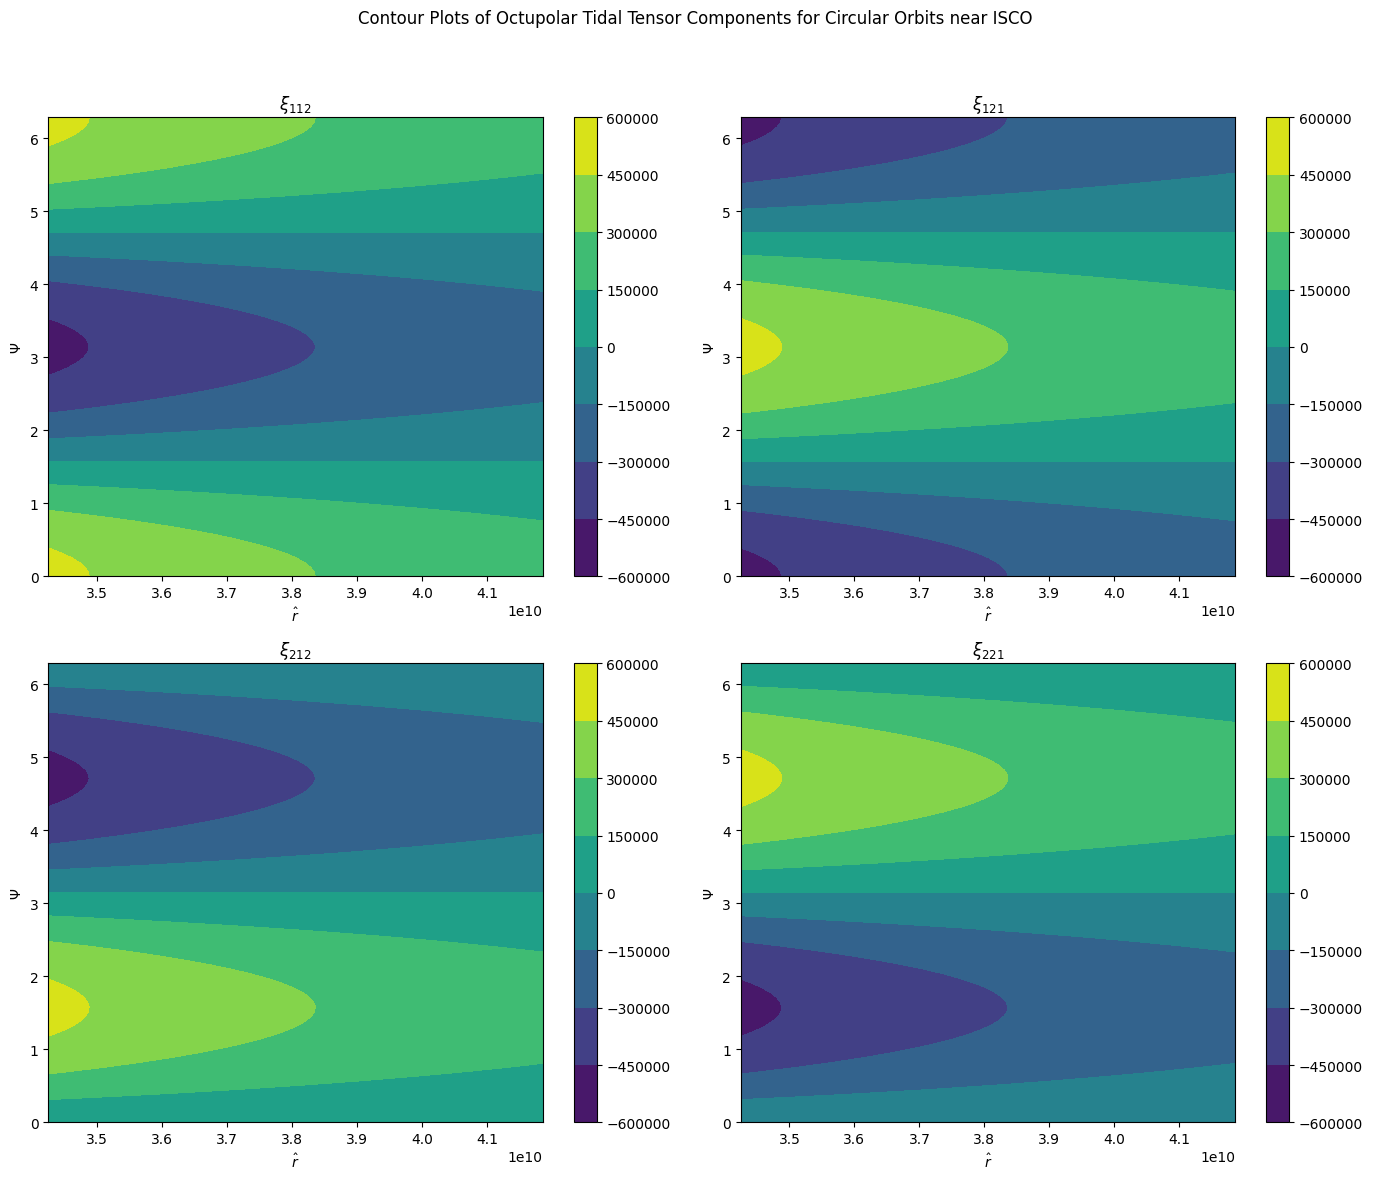

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e30  # Solar mass in kg
M_BH = 4.3e6 * M_sol  # Mass of the black hole in kg

# Define the ISCO radius
r_ISCO = 3 * (2 * G * M_BH) / c**2

# Define A^2
A_squared = 12 * (G * M_BH / c**2)**2

# Define the integral function for Psi_ISCO_circ
def integrand(r):
    numerator = r**2 * np.sqrt(2 / G) * c * (c**2 / (3 * G) - 1)
    denominator = (r**2 + 12 * (G * M_BH / c**2)**2) * np.sqrt(
        2 * c**2 * (c**2 / (3 * G) - 1)**2 * r**4 - (r**2 - 2 * G * M_BH * r) * (r**2 + 12 * (G * M_BH / c**2)**2)
    )
    return numerator / denominator

Psi_ISCO_circ, _ = quad(integrand, 0, r_ISCO)

# Define the octupolar tidal tensor components
def xi_112(r, Psi):
    return 3 * (np.sqrt(A_squared) / r**2) * np.sqrt(r**2 + A_squared) * (M_BH / r**3) * np.cos(Psi)

def xi_121(r, Psi):
    return -xi_112(r, Psi)

def xi_212(r, Psi):
    return 3 * (np.sqrt(A_squared) / r**2) * np.sqrt(r**2 + A_squared) * (M_BH / r**3) * np.sin(Psi)

def xi_221(r, Psi):
    return -xi_212(r, Psi)

# Define the range of r and Psi values
r_values = np.linspace(r_ISCO * 0.9, r_ISCO * 1.1, 100)  # Slightly around ISCO
Psi_values = np.linspace(0, 2 * np.pi, 100)

# Create meshgrid for r and Psi
r_grid, Psi_grid = np.meshgrid(r_values, Psi_values)

# Compute the octupolar tidal tensor components over the grid
xi_112_grid = xi_112(r_grid, Psi_grid)
xi_121_grid = xi_121(r_grid, Psi_grid)
xi_212_grid = xi_212(r_grid, Psi_grid)
xi_221_grid = xi_221(r_grid, Psi_grid)

# Plot the contour plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Contour plot for xi_112
contour1 = axs[0, 0].contourf(r_grid, Psi_grid, xi_112_grid, cmap='viridis')
fig.colorbar(contour1, ax=axs[0, 0])
axs[0, 0].set_title(r'$\xi_{112}$')
axs[0, 0].set_xlabel(r'$\hat{r}$')
axs[0, 0].set_ylabel(r'$\Psi$')

# Contour plot for xi_121
contour2 = axs[0, 1].contourf(r_grid, Psi_grid, xi_121_grid, cmap='viridis')
fig.colorbar(contour2, ax=axs[0, 1])
axs[0, 1].set_title(r'$\xi_{121}$')
axs[0, 1].set_xlabel(r'$\hat{r}$')
axs[0, 1].set_ylabel(r'$\Psi$')

# Contour plot for xi_212
contour3 = axs[1, 0].contourf(r_grid, Psi_grid, xi_212_grid, cmap='viridis')
fig.colorbar(contour3, ax=axs[1, 0])
axs[1, 0].set_title(r'$\xi_{212}$')
axs[1, 0].set_xlabel(r'$\hat{r}$')
axs[1, 0].set_ylabel(r'$\Psi$')

# Contour plot for xi_221
contour4 = axs[1, 1].contourf(r_grid, Psi_grid, xi_221_grid, cmap='viridis')
fig.colorbar(contour4, ax=axs[1, 1])
axs[1, 1].set_title(r'$\xi_{221}$')
axs[1, 1].set_xlabel(r'$\hat{r}$')
axs[1, 1].set_ylabel(r'$\Psi$')

plt.suptitle('Contour Plots of Octupolar Tidal Tensor Components for Circular Orbits near ISCO')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


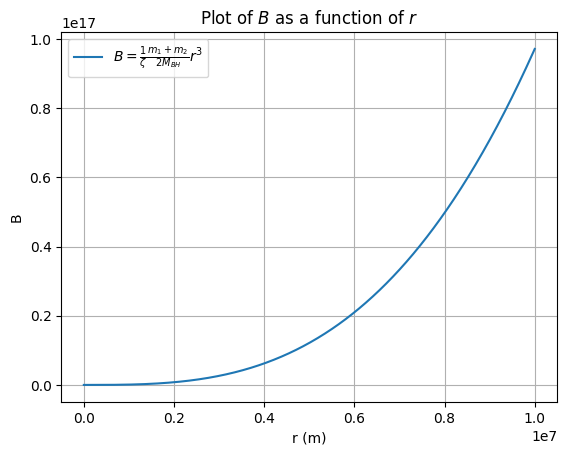

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

# Parameters
M_sol = 1.989e+30 #solar mass in Kg
m1 = 1.4 * M_sol # Mass m1 in terms of solar mass
m2 = 2.9  # Mass m2 in terms of solar mass
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in terms of solar mass (example value)

# Function to calculate B
def calculate_B(r, zeta, m1, m2, M_BH):
    return (1 / zeta) * ((m1 + m2) / (2 * M_BH)) * r**3

# Generate values for r
r_values = np.linspace(1e3, 1e7, 1000)  # Example range for r in meters

# Calculate the upper bound for zeta for each r
zeta_values = r_values * (c**2 * r_values / (2 * G * M_BH))**(1/4)

# Ensure zeta is much smaller than the upper bound
zeta = 0.0001 * np.min(zeta_values)  # Small value for zeta

# Calculate B for each r
B_values = calculate_B(r_values, zeta, m1, m2, M_BH)

# Plot B versus r
plt.plot(r_values, B_values, label=r'$B = \frac{1}{\zeta}\frac{m_1+m_2}{2 M_{BH}} r^3$')
plt.xlabel('r (m)')
plt.ylabel('B')
plt.title('Plot of $B$ as a function of $r$')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-5-0e8024904b96>:21: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1 + np.sqrt(1 - 12 * (M_BH / A)**2))**(-1)
<ipython-input-5-0e8024904b96>:38: RuntimeWarning: divide by zero encountered in scalar divide
  r = (6 * G * (m1 + m2) / c**2) * (1 + (1/3) * (A_squared / (16 * M_BH**2 * (1 - beta**2))))


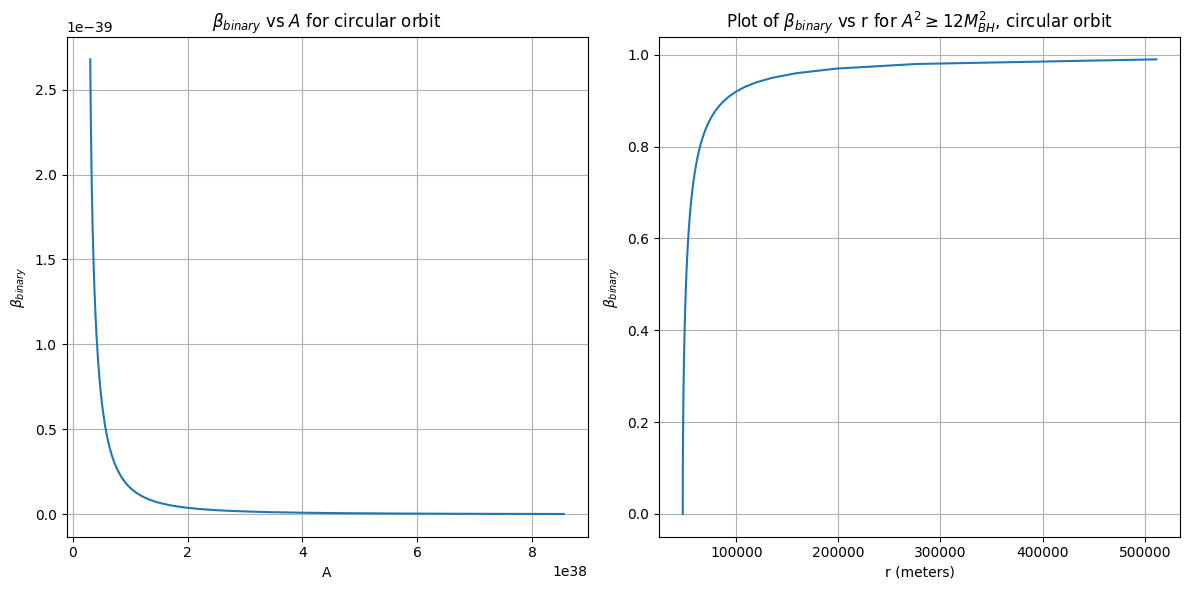

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
M_sol = 1.989e+30  # Solar mass in kg
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_cm = (m1 + m2) / (m1 * m2)

# Calculate zeta_bin
r_values = np.linspace(1e3, 1e7, 1000)
zeta_bin = 0.00001 * np.min(r_values * (c**2 * r_values / (2 * G * M_BH))**(1/4))

# Define the function for beta_binary
def beta_binary(A):
    term1 = zeta_bin / (A**2)
    term2 = (M_BH)**(3/2) / (M_cm)**(-1/2)
    term3 = (1 + np.sqrt(1 - 12 * (M_BH / A)**2))**(-1)
    return term1 * term2 * term3

# Generate values for A (ensuring valid range for sqrt term)
A_min = np.sqrt(12) * M_BH
A_values = np.linspace(A_min, 100 * M_BH, 1000)

# Calculate corresponding values of beta_binary
beta_values_1 = beta_binary(A_values)

# Range of beta values for the second plot
beta_values_2 = np.linspace(0, 1, 100)

# Calculate r for each beta value
r_values_2 = []
for beta in beta_values_2:
    A_squared = 12 * M_BH**2
    r = (6 * G * (m1 + m2) / c**2) * (1 + (1/3) * (A_squared / (16 * M_BH**2 * (1 - beta**2))))
    r_values_2.append(r)

# Plot the graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot beta_binary vs A
axs[0].plot(A_values, beta_values_1)
axs[0].set_xlabel('A')
axs[0].set_ylabel('$\\beta_{binary}$')
axs[0].set_title('$\\beta_{binary}$ vs $A$ for circular orbit')
axs[0].grid(True)

# Plot r vs beta (switched axes)
axs[1].plot(r_values_2, beta_values_2)
axs[1].set_xlabel('r (meters)')
axs[1].set_ylabel(r'$\beta_{binary}$')
axs[1].set_title(r'Plot of $\beta_{binary}$ vs r for $A^2 \geq 12M_{BH}^2$, circular orbit')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


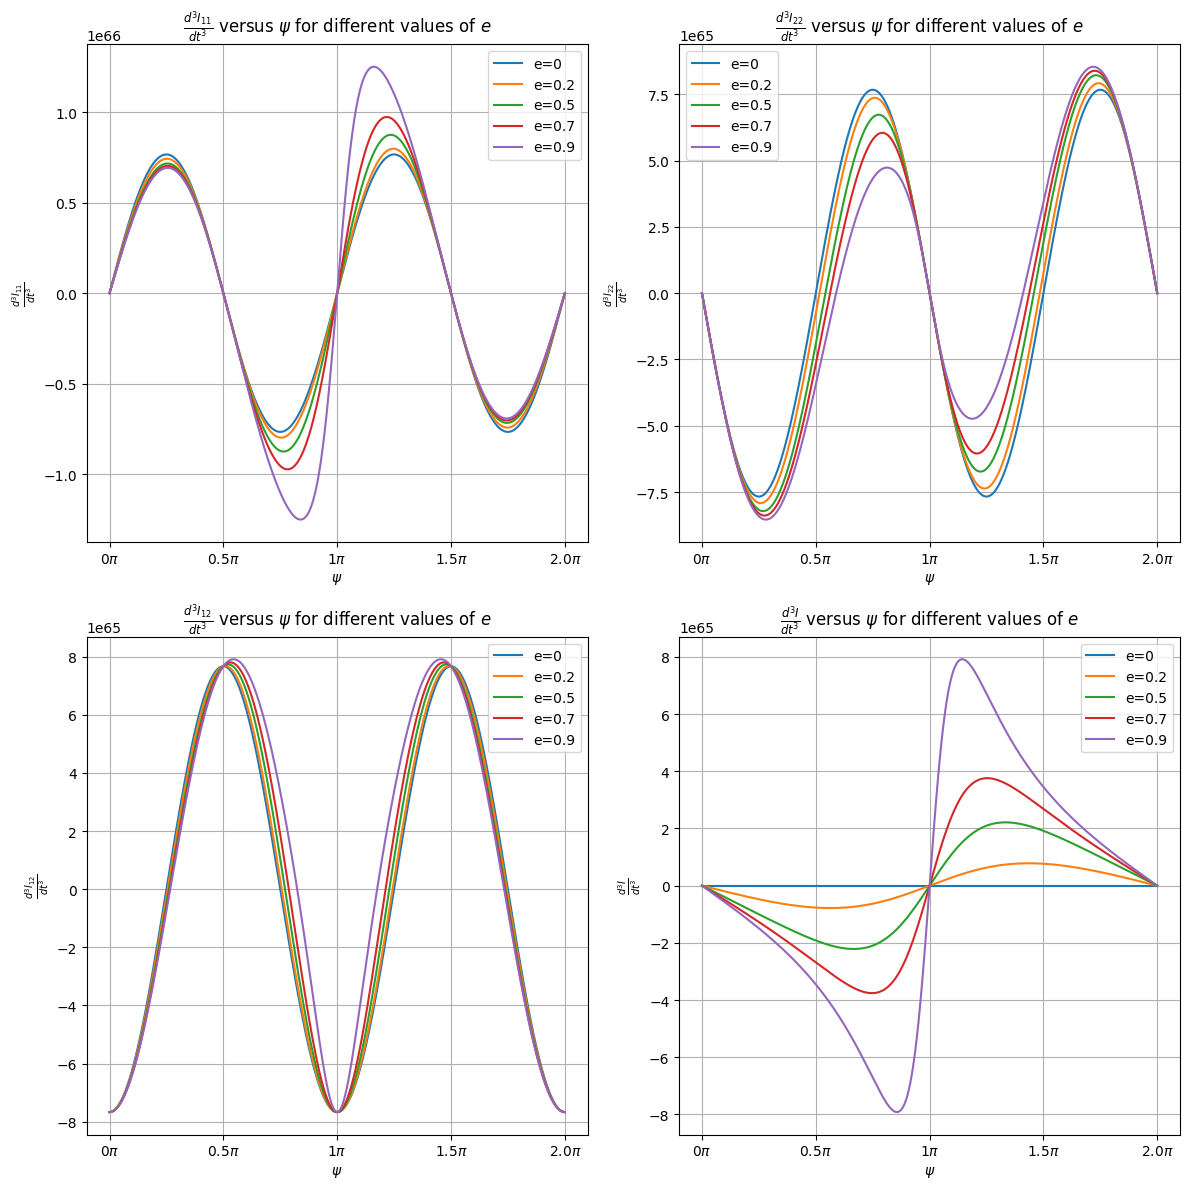

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
M_sol = 1.989e+30  # Solar mass in kg
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s

# Range for psi
psi_values = np.linspace(0, 2 * np.pi, 1000)

# Function to calculate dpsi/dt
def dpsi_dt(psi):
    return 1.0  # Assuming dpsi/dt is a constant for simplicity

# Function to calculate a
def calculate_a(zeta, e, psi):
    return (zeta + zeta * e * np.cos(psi)) / (2 * (1 - e**2))

# Function to calculate d^3 I_{11} / dt^3
def d3I11_dt3(psi, e, zeta):
    a = calculate_a(zeta, e, psi)
    term1 = (2 * m1 * m2) / (a * (1 - e**2))
    dpsi_dt_val = dpsi_dt(psi)
    result = term1 * (2 * np.sin(2 * psi) + 3 * e * np.cos(psi)**2 * np.sin(psi)) * dpsi_dt_val
    return result

# Function to calculate d^3 I_{22} / dt^3
def d3I22_dt3(psi, e, a):
    term = (2 * m1 * m2) / (a * (1 - e**2))
    dpsi_dt_val = dpsi_dt(psi)
    result = -term * (2 * np.sin(2 * psi) + e * np.sin(psi) + 3 * e * np.cos(psi)**2 * np.sin(psi)) * dpsi_dt_val
    return result

# Function to calculate d^3 I_{12} / dt^3
def d3I12_dt3(psi, e, a):
    term = (2 * m1 * m2) / (a * (1 - e**2))
    dpsi_dt_val = dpsi_dt(psi)
    result = -term * (2 * np.cos(2 * psi) - e * np.cos(psi) + 3 * e * np.cos(psi)**3) * dpsi_dt_val
    return result

# Function to calculate d^3 I / dt^3
def d3I_dt3(psi, e, a):
    term = (2 * m1 * m2) / (a * (1 - e**2))
    dpsi_dt_val = dpsi_dt(psi)
    result = -term * e * np.sin(psi) * dpsi_dt_val
    return result

# Calculate the appropriate zeta
r_values = np.linspace(1e3, 1e7, 1000)
zeta = 0.00001 * np.min(r_values * (c**2 * r_values / (2 * G * M_BH))**(1/4))

# Different values of e
e_values = [0, 0.2, 0.5, 0.7, 0.9]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# Define pi_multiples here
pi_multiples = np.array([0, 0.5, 1, 1.5, 2]) # Example multiples of pi
# Plot d^3 I_{11} / dt^3 versus psi for different values of e
for e in e_values:
    d3I11_values = d3I11_dt3(psi_values, e, zeta)
    axs[0, 0].plot(psi_values, d3I11_values, label=f'e={e}')

axs[0, 0].set_xticks(pi_multiples * np.pi)
axs[0, 0].set_xticklabels([f'{int(m)}$\pi$' if m == 0 or m == 1 else f'{m}$\pi$' for m in pi_multiples])
axs[0, 0].set_xlabel(r'$\psi$')
axs[0, 0].set_ylabel(r'$\frac{d^3 I_{11}}{dt^3}$')
axs[0, 0].set_title(r'$\frac{d^3 I_{11}}{dt^3}$ versus $\psi$ for different values of $e$')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot d^3 I_{22} / dt^3 versus psi for different values of e
for e in e_values:
    a_values = calculate_a(zeta, e, psi_values)
    d3I22_values = d3I22_dt3(psi_values, e, a_values)
    axs[0, 1].plot(psi_values, d3I22_values, label=f'e={e}')

axs[0, 1].set_xticks(pi_multiples * np.pi)
axs[0, 1].set_xticklabels([f'{int(m)}$\pi$' if m == 0 or m == 1 else f'{m}$\pi$' for m in pi_multiples])
axs[0, 1].set_xlabel(r'$\psi$')
axs[0, 1].set_ylabel(r'$\frac{d^3 I_{22}}{dt^3}$')
axs[0, 1].set_title(r'$\frac{d^3 I_{22}}{dt^3}$ versus $\psi$ for different values of $e$')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot d^3 I_{12} / dt^3 versus psi for different values of e
for e in e_values:
    a_values = calculate_a(zeta, e, psi_values)
    d3I12_values = d3I12_dt3(psi_values, e, a_values)
    axs[1, 0].plot(psi_values, d3I12_values, label=f'e={e}')

axs[1, 0].set_xticks(pi_multiples * np.pi)
axs[1, 0].set_xticklabels([f'{int(m)}$\pi$' if m == 0 or m == 1 else f'{m}$\pi$' for m in pi_multiples])
axs[1, 0].set_xlabel(r'$\psi$')
axs[1, 0].set_ylabel(r'$\frac{d^3 I_{12}}{dt^3}$')
axs[1, 0].set_title(r'$\frac{d^3 I_{12}}{dt^3}$ versus $\psi$ for different values of $e$')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot d^3 I / dt^3 versus psi for different values of e
for e in e_values:
    a_values = calculate_a(zeta, e, psi_values)
    d3I_values = d3I_dt3(psi_values, e, a_values)
    axs[1, 1].plot(psi_values, d3I_values, label=f'e={e}')

axs[1, 1].set_xticks(pi_multiples * np.pi)
axs[1, 1].set_xticklabels([f'{int(m)}$\pi$' if m == 0 or m == 1 else f'{m}$\pi$' for m in pi_multiples])
axs[1, 1].set_xlabel(r'$\psi$')
axs[1, 1].set_ylabel(r'$\frac{d^3 I}{dt^3}$')
axs[1, 1].set_title(r'$\frac{d^3 I}{dt^3}$ versus $\psi$ for different values of $e$')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


<ipython-input-8-019421ec1657>:9: RuntimeWarning: overflow encountered in scalar multiply
  term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)


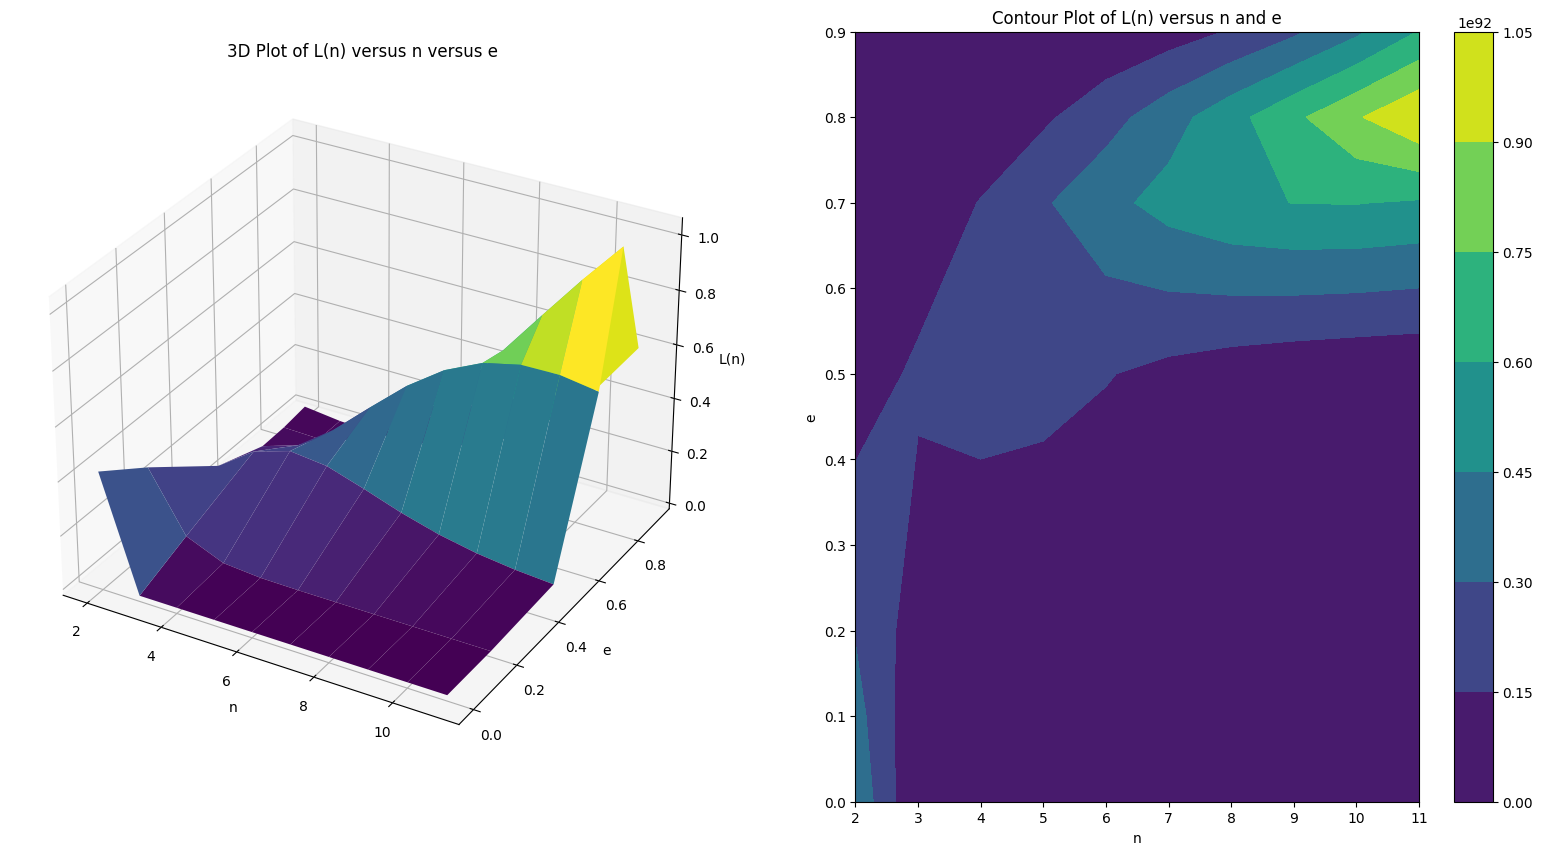

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

# Define the Bessel function J_n(ne)
def bessel_function(n, e, ne):
    result = 0
    for m in range(100):  # Summing over a finite number of terms
        term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)
        result += term
    return result

# Define the function g(n, e)
def g(n, e):
    ne = n * e
    Jn_2 = bessel_function(n - 2, e, ne)
    Jn_1 = bessel_function(n - 1, e, ne)
    Jn = bessel_function(n, e, ne)
    Jn_1p = bessel_function(n + 1, e, ne)
    Jn_2p = bessel_function(n + 2, e, ne)

    term1 = (n**4 / 32) * ((Jn_2 - 2 * e * Jn_1 + (2 / n) * Jn + 2 * e * Jn_1p)**2)
    term2 = (1 - e)**2 * ((Jn_2 - 2 * Jn + Jn_2p)**2)
    term3 = (4 / (3 * n**2)) * (Jn**2)

    return term1 + term2 + term3

# Define the function L(n)
def L(n, e, G, c, m1, m2, a):
    return (32/5) * (G**4 / c**5) * m1**2 * m2**2 * (m1 + m2) * a**(-5) * g(n, e)

# Parameters
M_sol = 1.989e+30  # Solar mass in kg
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
# Calculate the appropriate zeta
r_values = np.linspace(1e3, 1e7, 1000)
zeta = 0.00001 * np.min(r_values * (c**2 * r_values / (2 * G * M_BH))**(1/4))

# Generate values for n and e
n_values = np.arange(2, 12)  # n from 2 to 11
e_values = [0, 0.2, 0.5, 0.7, 0.8, 0.9]

# Range for psi
psi_values = np.linspace(0, 2 * np.pi, 100)

# Calculate L(n) for each combination of n, e, and psi
L_values = np.zeros((len(n_values), len(e_values), len(psi_values)))
for i, n in enumerate(n_values):
    for j, e in enumerate(e_values):
        for k, psi in enumerate(psi_values):
            a = zeta * (1 + e * np.cos(psi)) / (2 * (1 - e**2))
            L_values[i, j, k] = L(n, e, G, c, m1, m2, a)

# Average L over psi
L_avg = np.mean(L_values, axis=2)

# Generate values for n and e for the contour plot
n_values_contour = np.arange(2, 12)  # n from 2 to 11
e_values_contour = [0, 0.1, 0.2, 0.5, 0.7, 0.8, 0.9]

# Calculate L(n) for each combination of n, e, and psi for the contour plot
L_values_contour = np.zeros((len(n_values_contour), len(e_values_contour), len(psi_values)))
for i, n in enumerate(n_values_contour):
    for j, e in enumerate(e_values_contour):
        for k, psi in enumerate(psi_values):
            a = zeta * (1 + e * np.cos(psi)) / (2 * (1 - e**2))
            L_values_contour[i, j, k] = L(n, e, G, c, m1, m2, a)

# Average L over psi for the contour plot
L_avg_contour = np.mean(L_values_contour, axis=2)

# Plot the 3D surface plot and the contour plot side by side
fig = plt.figure(figsize=(20, 10))
fig_manager = plt.get_current_fig_manager()
fig_manager.full_screen_toggle()

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
n_grid, e_grid = np.meshgrid(n_values, e_values)
ax1.plot_surface(n_grid, e_grid, L_avg.T, cmap='viridis')
ax1.set_xlabel('n')
ax1.set_ylabel('e')
ax1.set_zlabel('L(n)')
ax1.set_title('3D Plot of L(n) versus n versus e')

# Contour plot
ax2 = fig.add_subplot(122)
n_grid_contour, e_grid_contour = np.meshgrid(n_values_contour, e_values_contour)
cp = ax2.contourf(n_grid_contour, e_grid_contour, L_avg_contour.T, cmap='viridis')
fig.colorbar(cp, ax=ax2)  # Add a colorbar to the plot
ax2.set_xlabel('n')
ax2.set_ylabel('e')
ax2.set_title('Contour Plot of L(n) versus n and e')

plt.show()


<ipython-input-16-0ef17c218fa0>:19: RuntimeWarning: divide by zero encountered in divide
  term1 = (n**4 / 32) * ((Jn_2 - 2 * e * Jn_1 + (2 / n) * Jn + 2 * e * Jn_1p)**2)
<ipython-input-16-0ef17c218fa0>:21: RuntimeWarning: divide by zero encountered in divide
  term3 = (4 / (3 * n**2)) * (Jn**2)
<ipython-input-16-0ef17c218fa0>:29: RuntimeWarning: divide by zero encountered in scalar power
  term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)
<ipython-input-16-0ef17c218fa0>:29: RuntimeWarning: invalid value encountered in scalar multiply
  term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)
<ipython-input-16-0ef17c218fa0>:29: RuntimeWarning: overflow encountered in scalar multiply
  term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)
<ipython-input-16-0ef17c218fa0>:42: RuntimeWarning: divide by zero encountered in scalar divide
  term1 = (n**4 / 32) * ((Jn_2 - 2 * e * Jn_1 + (2 / n) * Jn + 2 * e * Jn_1p)**2)
<ipython-input-1

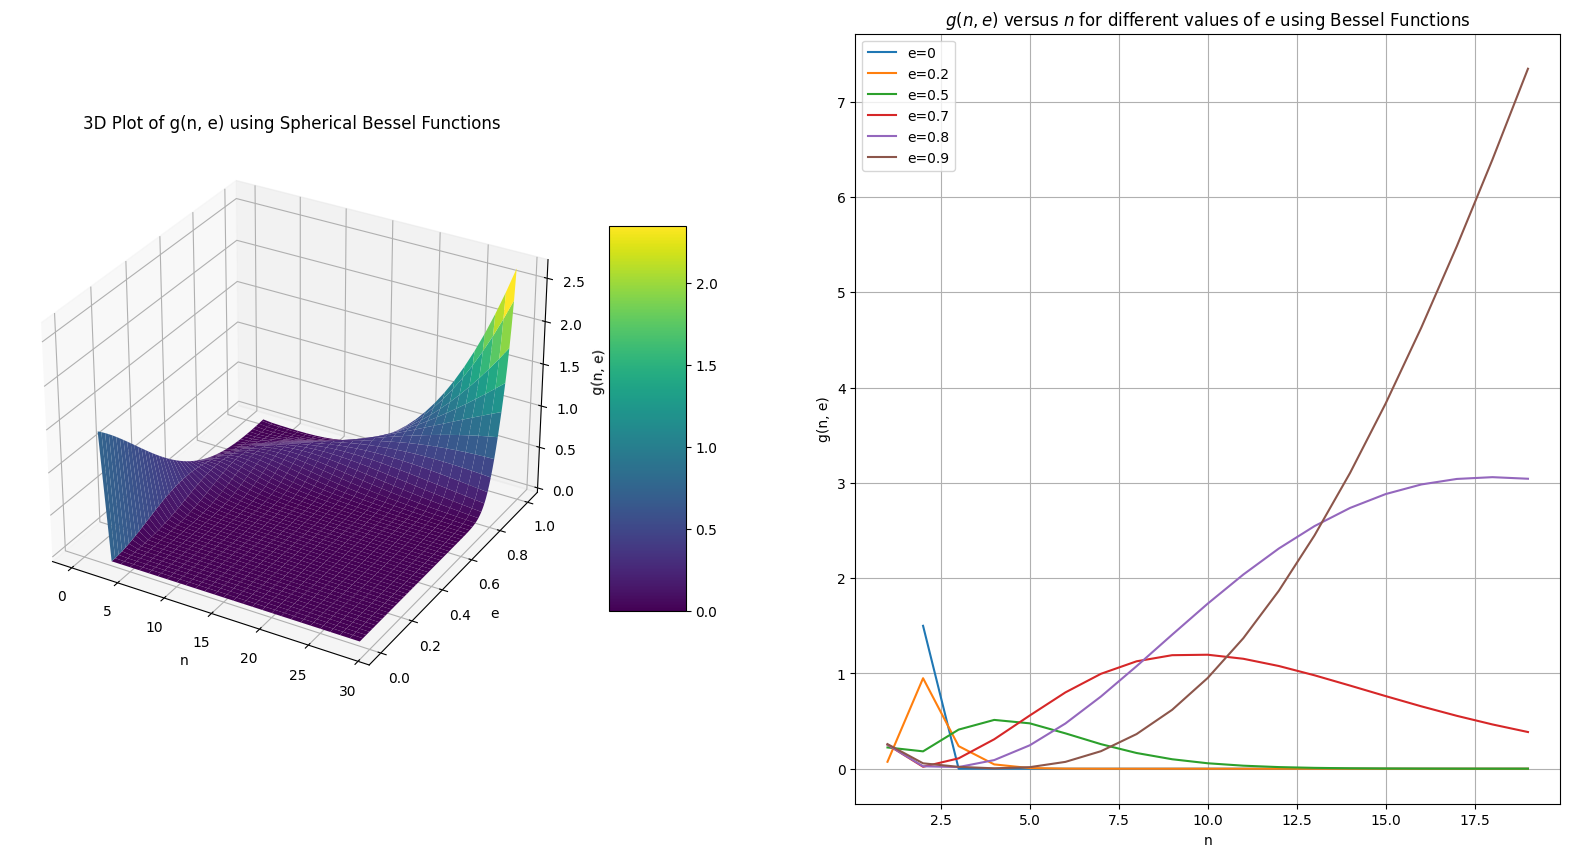

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import spherical_jn, gamma, factorial

# Define the spherical Bessel function j_n(x)
def spherical_bessel_function(n, x):
    return spherical_jn(n, x)

# Define the function g(n, e) using spherical Bessel functions
def g_spherical(n, e):
    ne = n * e
    Jn_2 = spherical_bessel_function(n - 2, ne)
    Jn_1 = spherical_bessel_function(n - 1, ne)
    Jn = spherical_bessel_function(n, ne)
    Jn_1p = spherical_bessel_function(n + 1, ne)
    Jn_2p = spherical_bessel_function(n + 2, ne)

    term1 = (n**4 / 32) * ((Jn_2 - 2 * e * Jn_1 + (2 / n) * Jn + 2 * e * Jn_1p)**2)
    term2 = (1 - e)**2 * ((Jn_2 - 2 * Jn + Jn_2p)**2)
    term3 = (4 / (3 * n**2)) * (Jn**2)

    return term1 + term2 + term3

# Define the Bessel function J_n(ne)
def bessel_function(n, e, ne):
    result = 0
    for m in range(100):  # Summing over a finite number of terms
        term = ((-1)**m / (factorial(m) * gamma(m + n + 1))) * (ne/2)**(2*m + n)
        result += term
    return result

# Define the function g(n, e)
def g_bessel(n, e):
    ne = n * e
    Jn_2 = bessel_function(n - 2, e, ne)
    Jn_1 = bessel_function(n - 1, e, ne)
    Jn = bessel_function(n, e, ne)
    Jn_1p = bessel_function(n + 1, e, ne)
    Jn_2p = bessel_function(n + 2, e, ne)

    term1 = (n**4 / 32) * ((Jn_2 - 2 * e * Jn_1 + (2 / n) * Jn + 2 * e * Jn_1p)**2)
    term2 = (1 - e)**2 * ((Jn_2 - 2 * Jn + Jn_2p)**2)
    term3 = (4 / (3 * n**2)) * (Jn**2)

    return term1 + term2 + term3

# Generate values for n and e
n_values_spherical = np.arange(0, 30, 1)  # n from 0 to 29
e_values_spherical = np.linspace(0, 0.999, 100)
n_values_bessel = np.arange(0, 20, 1)  # n from 0 to 19
e_values_bessel = [0, 0.2, 0.5, 0.7, 0.8, 0.9]

# Create meshgrid for n and e
n_grid_spherical, e_grid_spherical = np.meshgrid(n_values_spherical, e_values_spherical)

# Calculate g(n, e) for each combination of n and e for spherical Bessel functions
g_values_spherical = g_spherical(n_grid_spherical, e_grid_spherical)

# Create a figure with two subplots
fig = plt.figure(figsize=(20, 10))
fig_manager = plt.get_current_fig_manager()
fig_manager.full_screen_toggle()

# 3D surface plot using spherical Bessel functions
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(n_grid_spherical, e_grid_spherical, g_values_spherical, cmap='viridis')
ax1.set_xlabel('n')
ax1.set_ylabel('e')
ax1.set_zlabel('g(n, e)')
ax1.set_title('3D Plot of g(n, e) using Spherical Bessel Functions')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Plot g(n, e) versus n for each value of e using standard Bessel functions
ax2 = fig.add_subplot(122)
for e in e_values_bessel:
    g_values_bessel = [g_bessel(n, e) for n in n_values_bessel]
    ax2.plot(n_values_bessel, g_values_bessel, label=f'e={e}')

ax2.set_xlabel('n')
ax2.set_ylabel('g(n, e)') # Changed 'set_ylabela' to 'set_ylabel'
ax2.set_title('$g(n,e)$ versus $n$ for different values of $e$ using Bessel Functions')
ax2.legend()
ax2.grid(True)

plt.show()


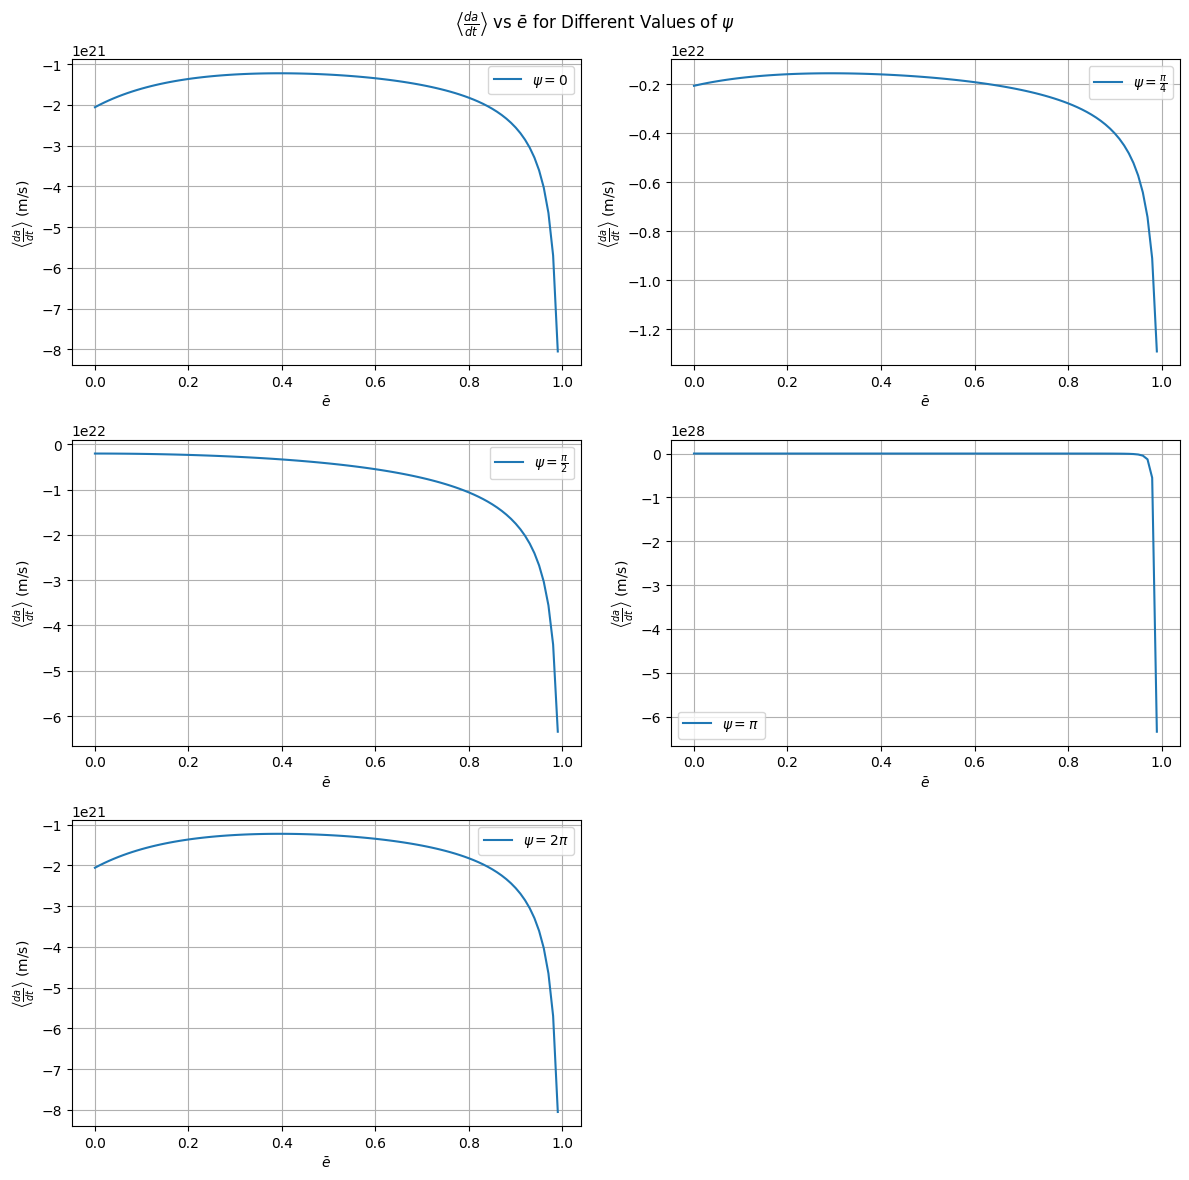

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e+30  # Solar mass in kg

# Parameters
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
r = 1e6  # Some distance value in meters

# Calculate zeta
zeta = 0.00001 * r * (c**2 * r / (2 * G * M_BH))**(1/4)

# Define the function f(e)
def f(e):
    return (1 + (73 / 24) * e**2 + (37 / 96) * e**4) / (1 - e**2)**(7/2)

# Define the function <da/dt>
def da_dt(a, e, m1, m2):
    return - (64 / 5) * (G**3 / c**5) * (m1 * m2 * (m1 + m2)) / a**3 * f(e)

# Range of e
e_values = np.linspace(0, 0.99, 100)

# Calculate a for given zeta and e
psi_values = [0, np.pi/4, np.pi/2, np.pi, 2*np.pi]  # Different psi values
psi_labels = ['0', r'\frac{\pi}{4}', r'\frac{\pi}{2}', r'\pi', r'2\pi']  # Corresponding labels

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, (psi, label) in enumerate(zip(psi_values, psi_labels)):
    a_values = zeta * (1 + e_values * np.cos(psi)) / (2 * (1 - e_values**2))

    # Calculate <da/dt> for each e
    da_dt_values = da_dt(a_values, e_values, m1, m2)

    # Plot <da/dt> vs e
    axs[i].plot(e_values, da_dt_values, label=r'$\psi = {}$'.format(label))
    axs[i].set_xlabel(r'$\bar{e}$')
    axs[i].set_ylabel(r'$\left<\frac{d a}{d t}\right>$ (m/s)')
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplot (the last one in this case)
fig.delaxes(axs[-1])

plt.suptitle(r'$\left<\frac{d a}{d t}\right>$ vs $\bar{e}$ for Different Values of $\psi$')
plt.tight_layout()
plt.show()


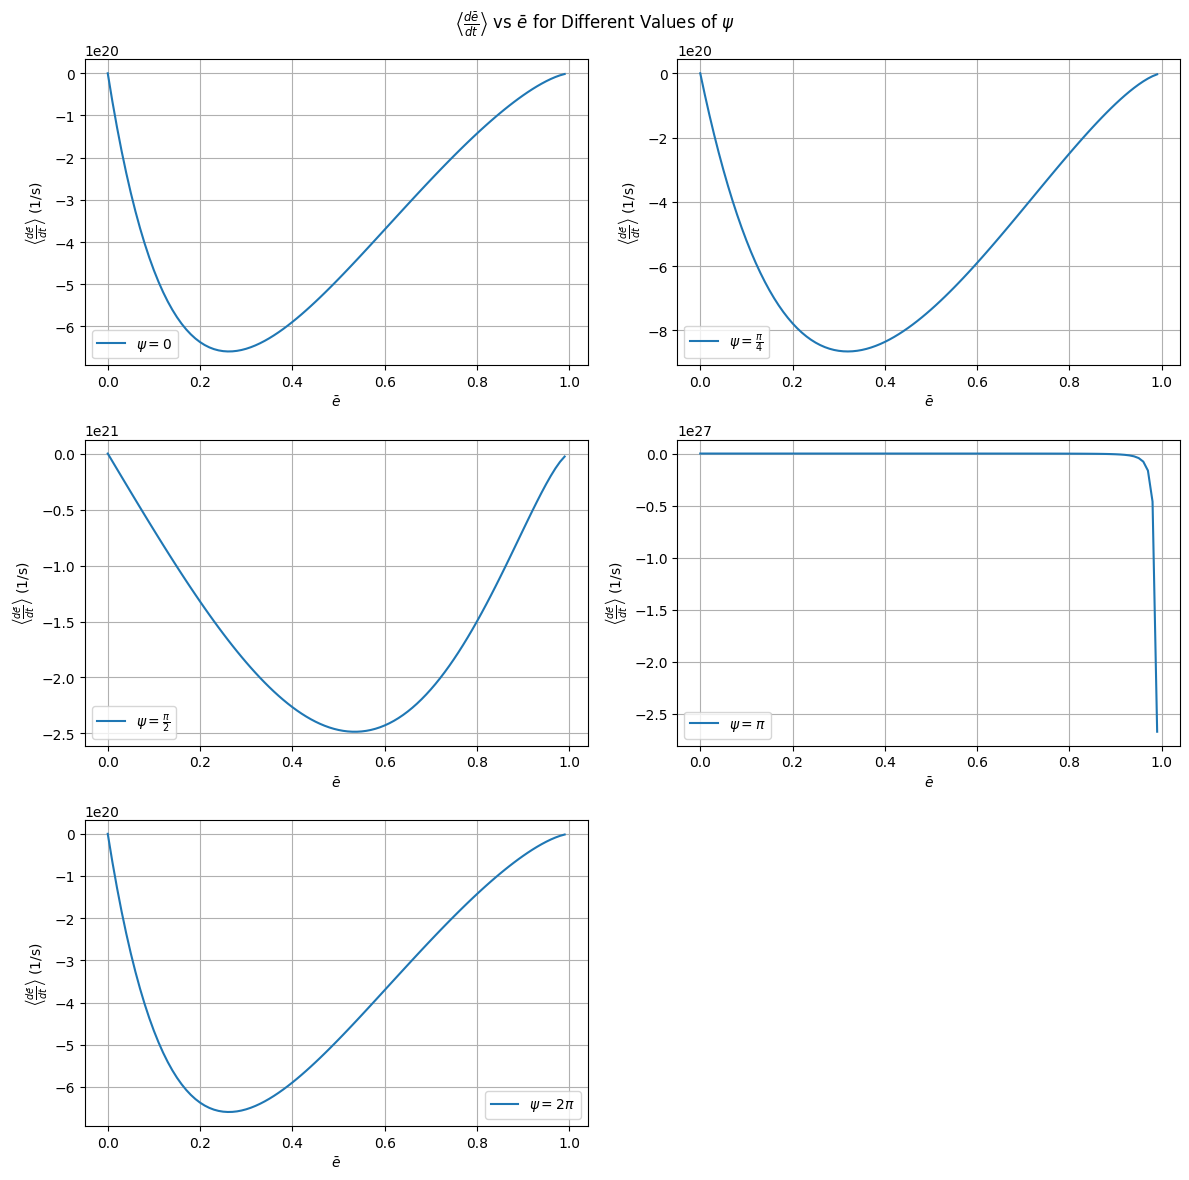

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e+30  # Solar mass in kg

# Parameters
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
r = 1e6  # Some distance value in meters

# Calculate zeta
zeta = 0.00001 * r * (c**2 * r / (2 * G * M_BH))**(1/4)

# Define the function <de/dt>
def de_dt(e, a, m1, m2):
    numerator = e + (121 / 304) * e**3
    denominator = (1 - e**2)**(5/2)
    return - (304 / 15) * (G**3 * m1 * m2 * (m1 + m2) / (a**4 * c**5)) * (numerator / denominator)

# Range of e
e_values = np.linspace(0, 0.99, 100)

# Calculate a for given zeta and e
psi_values = [0*np.pi, (np.pi)/4, (np.pi)/2, np.pi, 2*np.pi]  # Different psi values
psi_labels = ['0', r'\frac{\pi}{4}', r'\frac{\pi}{2}', r'\pi', r'2\pi']  # Corresponding labels

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, (psi, label) in enumerate(zip(psi_values, psi_labels)):
    a_values = zeta * (1 + e_values * np.cos(psi)) / (2 * (1 - e_values**2))

    # Calculate <de/dt> for each e
    de_dt_values = de_dt(e_values, a_values, m1, m2)

    # Plot <de/dt> vs e
    axs[i].plot(e_values, de_dt_values, label=r'$\psi = {}$'.format(label))
    axs[i].set_xlabel(r'$\bar{e}$')
    axs[i].set_ylabel(r'$\left<\frac{d \bar{e}}{d t}\right>$ (1/s)')
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplot (the last one in this case)
fig.delaxes(axs[-1])

plt.suptitle(r'$\left<\frac{d \bar{e}}{d t}\right>$ vs $\bar{e}$ for Different Values of $\psi$')
plt.tight_layout()
plt.show()


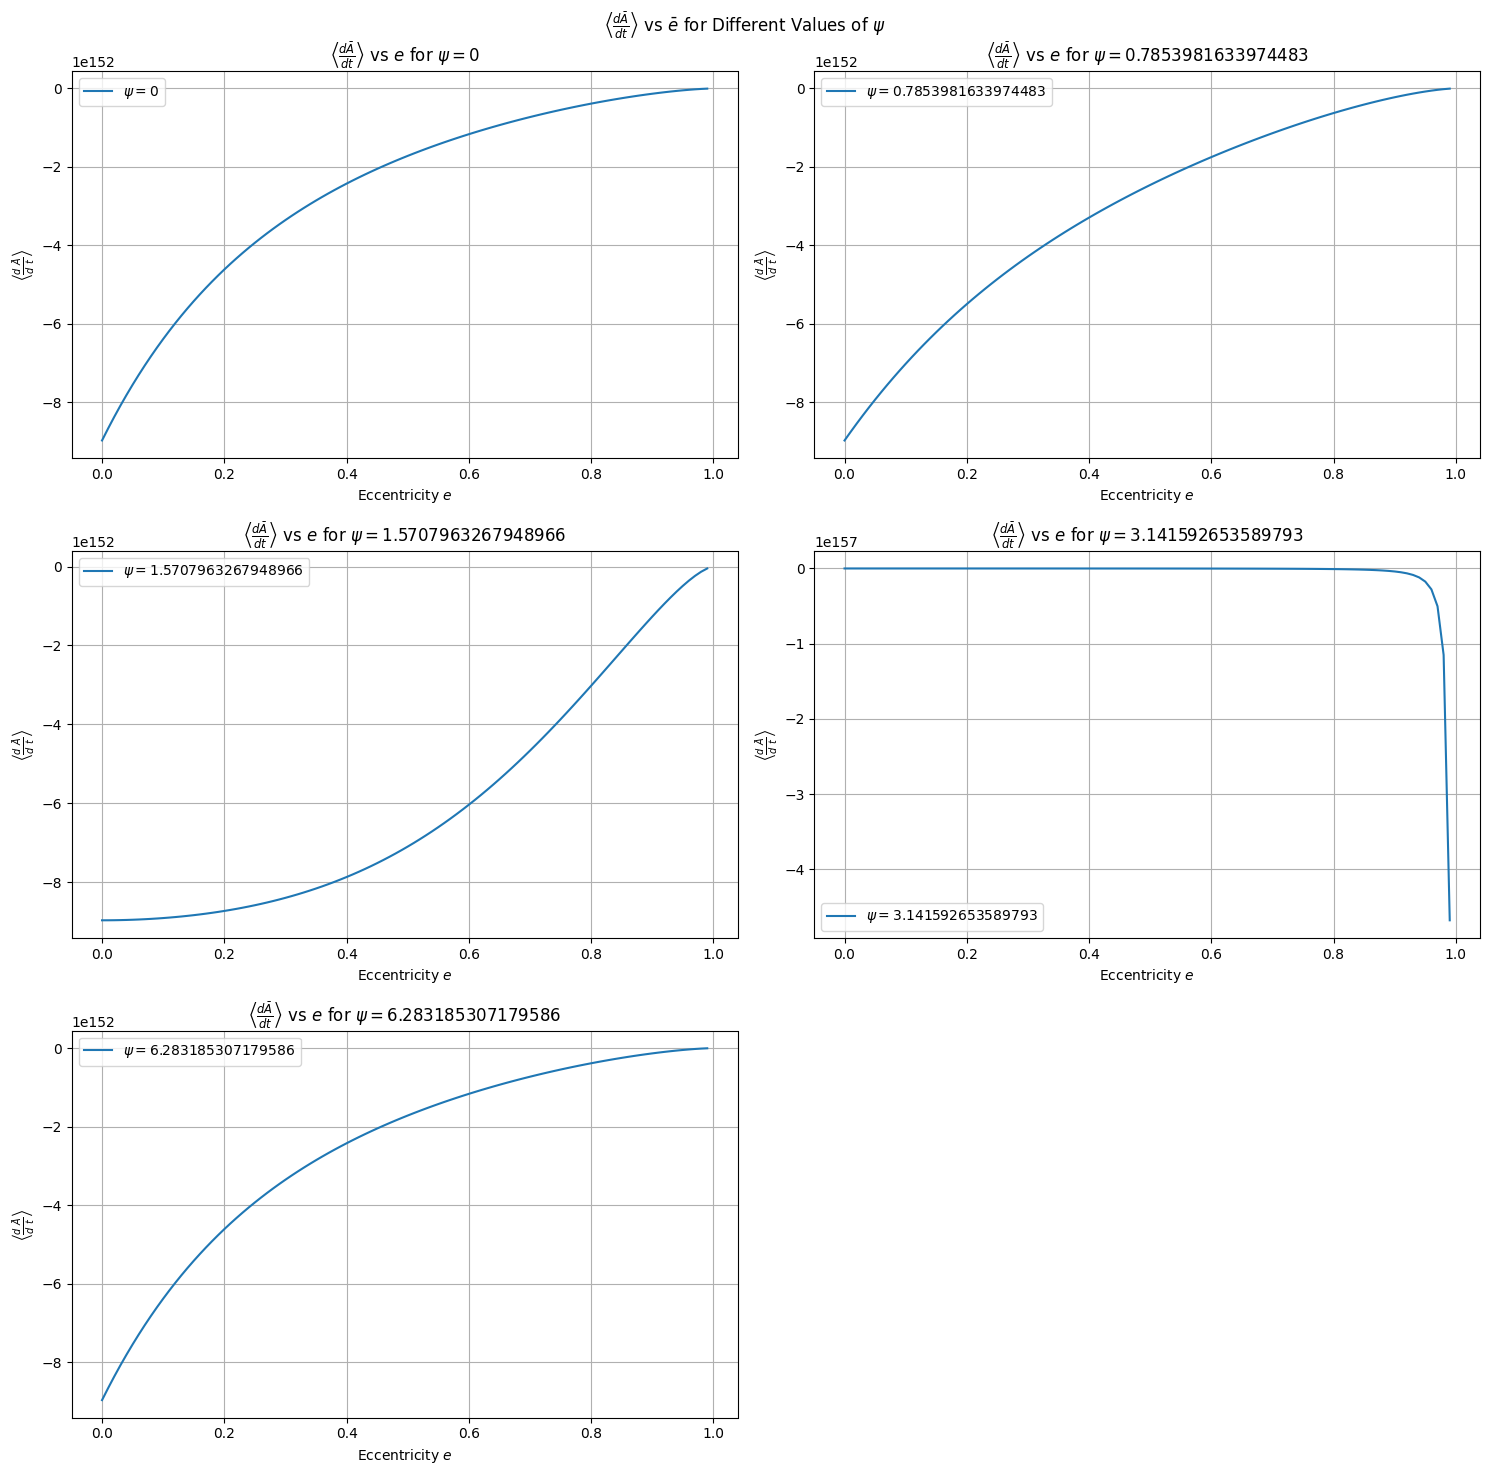

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
M_sol = 1.989e+30  # Solar mass in kg
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg

# Define the function to calculate dA/dt
def dA_dt(m1, m2, a, e):
    numerator = -32/5 * m1**2 * m2**2 * (m1 + m2)**(1/2)
    denominator = a**(7/2) * (1 - e**2)**2
    factor = 1 + 7/8 * e**2
    return numerator / denominator * factor

# Calculate zeta_bin
r_values = np.linspace(1e3, 1e7, 1000)
zeta_bin = 0.00001 * np.min(r_values * (c**2 * r_values / (2 * G * M_BH))**(1/4))

# Eccentricity and psi values
e_values = np.linspace(0, 0.99, 100)
psi_values = [0, np.pi/4, np.pi/2, np.pi, 2*np.pi]

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

for idx, psi in enumerate(psi_values):
    dA_dt_values = []
    for e in e_values:
        a = zeta_bin * (1 + e * np.cos(psi)) / (2 * (1 - e**2))
        dA_dt_value = dA_dt(m1, m2, a, e)
        dA_dt_values.append(dA_dt_value)

    axs[idx].plot(e_values, dA_dt_values, label=f'$\psi = {psi}$')
    axs[idx].set_xlabel('Eccentricity $e$')
    axs[idx].set_ylabel(r'$\left<\frac{d \ \bar{A}}{d \ t}\right>$')
    axs[idx].set_title(f'$\left<\\frac{{d \\bar{{A}}}}{{d t}}\\right>$ vs $e$ for $\psi = {psi}$')
    axs[idx].legend()
    axs[idx].grid(True)
plt.suptitle(r'$\left<\frac{d \bar{A}}{d t}\right>$ vs $\bar{e}$ for Different Values of $\psi$')
# Remove any empty subplots
for ax in axs[len(psi_values):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


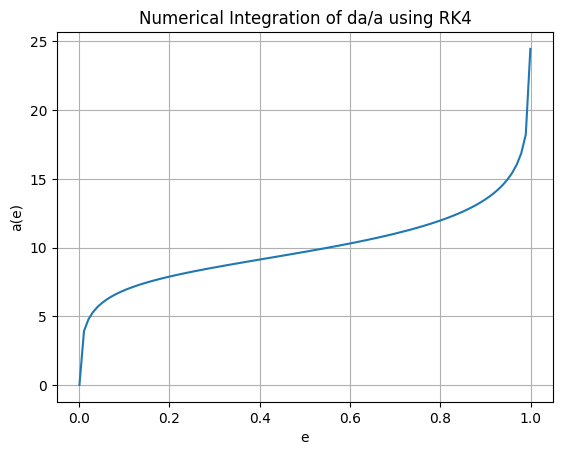

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the right-hand side of the differential equation
def rhs(a, e):
    return (12/9) * (1 + (73/24)*e**2 + (37/96)*e**4) / (e * (1 - e**2) * (1 + (121/304)*e**2))

# Function to perform one step of RK4
def rk4_step(a, e, h):
    k1 = h * rhs(a, e)
    k2 = h * rhs(a + 0.5*k1, e + 0.5*h)
    k3 = h * rhs(a + 0.5*k2, e + 0.5*h)
    k4 = h * rhs(a + k3, e + h)
    return a + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial condition
a0 = 0.0

# Values of e
e_values = np.linspace(0.001, 0.999, 100)  # Avoiding division by zero at e=0 and e=1

# Step size
h = e_values[1] - e_values[0]

# Perform RK4 integration
a_values = [a0]
for i in range(1, len(e_values)):
    a_values.append(rk4_step(a_values[-1], e_values[i-1], h))

# Plot the result
plt.plot(e_values, a_values)
plt.xlabel('e')
plt.ylabel('a(e)')
plt.title('Numerical Integration of da/a using RK4')
plt.grid(True)
plt.show()


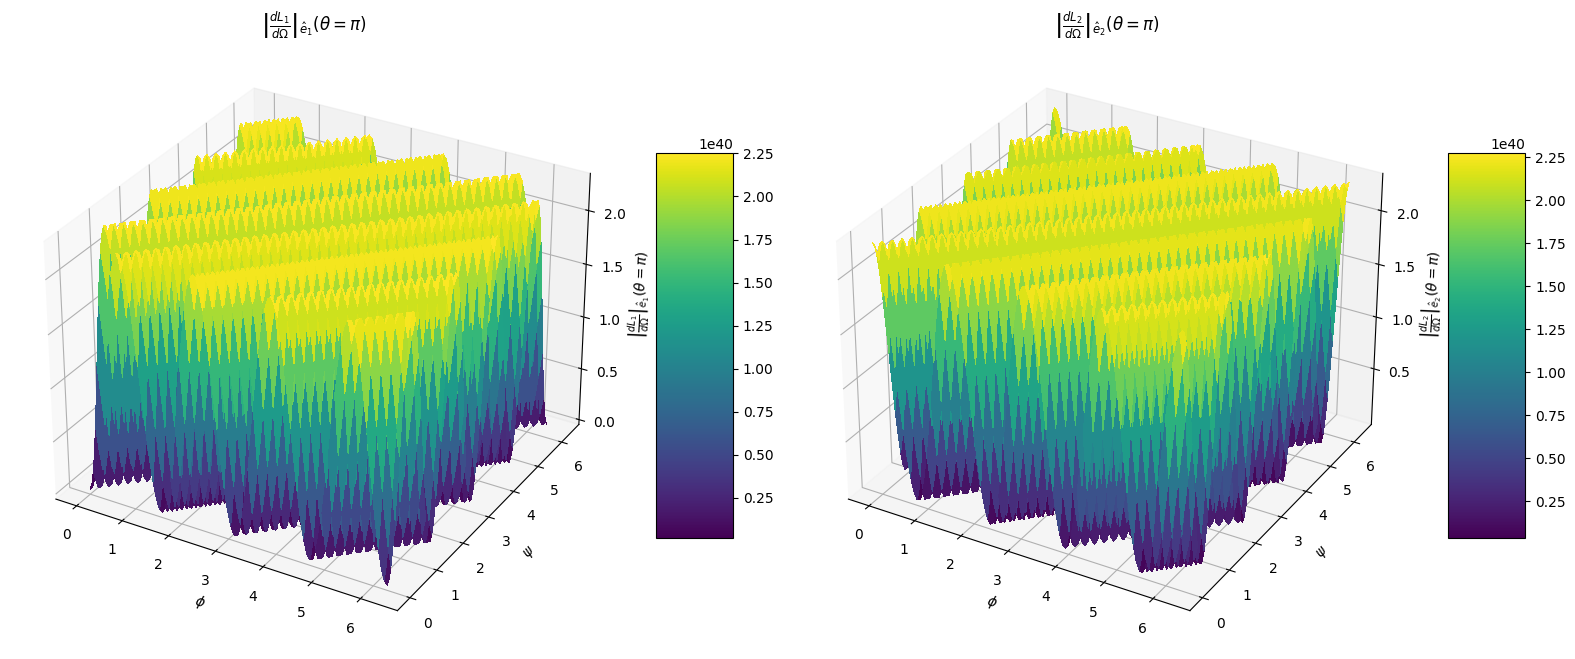

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and parameters
M_sol = 1.989e+30  # Solar mass in kg
m1 = 1.4 * M_sol  # Mass m1 in kg
m2 = 2.9 * M_sol  # Mass m2 in kg
M_BH = 4.3e+6 * M_sol  # Mass of the black hole in kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8  # Speed of light in m/s
r = 1e6  # Fixed value for r

# Function to calculate dL1/dOmega_hat_e1
def dL1_dOmega_hat_e1(phi, psi):
    return (4 / np.pi) * (G**4 / c**5) * m1**2 * m2**2 * (m1 + m2) / r**5 * np.sin(2 * (phi - psi))**2

# Function to calculate dL2/dOmega_hat_e2
def dL2_dOmega_hat_e2(phi, psi):
    return (4 / np.pi) * (G**4 / c**5) * m1**2 * m2**2 * (m1 + m2) / r**5 * np.cos(2 * (phi - psi))**2

# Range for phi and psi
phi_values = np.linspace(0, 2*np.pi, 100)
psi_values = np.linspace(0, 2*np.pi, 100)

# Create grid of values
phi_grid, psi_grid = np.meshgrid(phi_values, psi_values)

# Calculate function values for theta = pi for both functions
dL1_dOmega_theta_pi = dL1_dOmega_hat_e1(phi_grid, psi_grid + np.pi)  # For theta = pi, shift psi by pi
dL2_dOmega_theta_pi = dL2_dOmega_hat_e2(phi_grid, psi_grid + np.pi)  # For theta = pi, shift psi by pi

# Plot both surfaces in a single figure
fig = plt.figure(figsize=(16, 8))

# Plot surface for dL1/dOmega_hat_e1(theta=pi)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(phi_grid, psi_grid, dL1_dOmega_theta_pi, cmap='viridis', linewidth=0, antialiased=False)
ax1.set_xlabel('$\\phi$')
ax1.set_ylabel('$\\psi$')
ax1.set_zlabel('$\\left| \\frac{d L_{1}}{d \\Omega}\\right|_{\\hat{e}_1}(\\theta=\\pi)$')
ax1.set_title('$\\left| \\frac{d L_{1}}{d \\Omega}\\right|_{\\hat{e}_1}(\\theta=\\pi)$')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Plot surface for dL2/dOmega_hat_e2(theta=pi)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(phi_grid, psi_grid, dL2_dOmega_theta_pi, cmap='viridis', linewidth=0, antialiased=False)
ax2.set_xlabel('$\\phi$')
ax2.set_ylabel('$\\psi$')
ax2.set_zlabel('$\\left| \\frac{d L_{2}}{d \\Omega}\\right|_{\\hat{e}_2}(\\theta=\\pi)$')
ax2.set_title('$\\left| \\frac{d L_{2}}{d \\Omega}\\right|_{\\hat{e}_2}(\\theta=\\pi)$')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


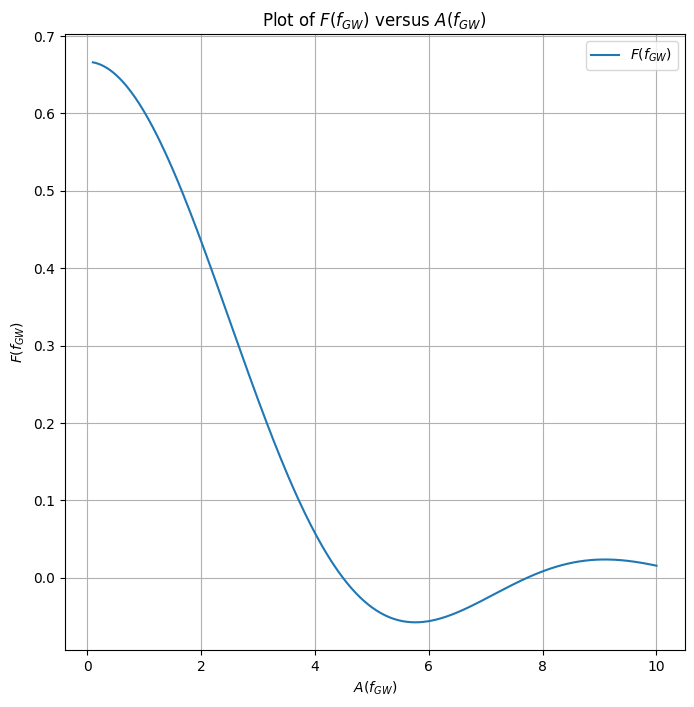

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function F(f_GW)
def F(A):
    return (2 / A**2) * (np.sin(A) / A - np.cos(A))

# Generate values for A(f_GW)
A = np.linspace(0.1, 10, 400)  # Avoid A = 0 to prevent division by zero

# Calculate F(f_GW) for these values
F_values = F(A)

# Plot F(f_GW) versus A(f_GW)
plt.figure(figsize=(8, 8))
plt.plot(A, F_values, label=r'$F(f_{GW})$')
plt.xlabel(r'$A(f_{GW})$')
plt.ylabel(r'$F(f_{GW})$')
plt.title(r'Plot of $F(f_{GW})$ versus $A(f_{GW})$')
plt.legend()
plt.grid(True)
plt.show()
